<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> ОПИСАНИЕ ПРОЕКТА </b></font>

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

<font size=+2><b> ПЛАН РАБОТЫ: </b></font>
    
<font size=+1><b> 1. Загрузка и предобработка данных. </b></font>
    
<font size=+1><b> 2. Анализ данных. </b></font>
    
- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
- Выделите в отдельный столбец информацию об улице из столбца address .
- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
    
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.
    
</div>

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> 1. ЗАГРУЗКА И ПРЕДОБРАБОТКА ДАННЫХ. </b></font>

<font size=+1><b> 1.1. Загрузка данных. </b></font>
    
Описание данных, таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.
    
<font size=+1><b> 1.2. Поиск пропущенных данных. </b></font>
    
Пропущенных данных в датасете нет.
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import requests

In [2]:
try:
    df_raw = pd.read_csv('rest_data.csv')
except FileNotFoundError:
    df_raw = pd.read_csv('/datasets/rest_data.csv')
    
df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 1.3. Изменение типов данных. </b></font>

Нет данных, которые необходимо привести к другому типу
    
<font size=+1><b> 1.4. Поиск дубликатов. </b></font>

Произведём поиск дубликатов, явных и неявных (где это оправдано).
    
Явных дубликатов не обнаружено. В столбце object_name более 10 тысяч уникальных значений, поэтому там поиск дубликатов проводить нецелесообразно (хотя они наверняка есть). В трёх других столбцах дубликатов не обнаружено. 
</div>

In [3]:
print('Потенциальные дубликаты в датасете:', df_raw.loc[:, 'chain':'number'].duplicated().sum())

Потенциальные дубликаты в датасете: 1041


In [4]:
df_raw['object_name'] = df_raw['object_name'].str.lower()

In [5]:
print('Количество явных дубликатов в датасете:', df_raw.duplicated().sum(), '\n')
print('Количество явных дубликатов в датасете:', df_raw.loc[:, 'object_name':'number'].duplicated().sum(), '\n')
df_raw.loc[:, 'object_name':'number'] = df_raw.loc[:, 'object_name':'number'].drop_duplicates().reset_index(drop=True)
df_raw = df_raw.dropna()
df_raw.info()

print('Количество дубликатов в столбце id:', df_raw['id'].duplicated().sum(), '\n')

print('Значения в столбце chain:', df_raw['chain'].unique(), '\n')

print('Значения в столбце object_type:', df_raw.sort_values(by='object_type')['object_type'].unique(), '\n')

print('Значения в столбце object_name:', df_raw['object_name'].nunique())

Количество явных дубликатов в датасете: 0 

Количество явных дубликатов в датасете: 85 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15281 non-null  int64  
 1   object_name  15281 non-null  object 
 2   chain        15281 non-null  object 
 3   object_type  15281 non-null  object 
 4   address      15281 non-null  object 
 5   number       15281 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 835.7+ KB
Количество дубликатов в столбце id: 0 

Значения в столбце chain: ['нет' 'да'] 

Значения в столбце object_type: ['бар' 'буфет' 'закусочная' 'кафе' 'кафетерий' 'магазин (отдел кулинарии)'
 'предприятие быстрого обслуживания' 'ресторан' 'столовая'] 

Значения в столбце object_name: 9924


<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 1.5. Поиск аномальных значений. </b></font>

В датасете есть лишь один столбец с численными данными. Исследуем его на предмет аномальных данных.
    
Видно, что есть некоторая часть распределения с количеством посадочных мест >= 500. Это не единичные рестораны, поэтому их наличие не является артефактом. При необходимости сможем отфильтровать эти данные далее.
</div>

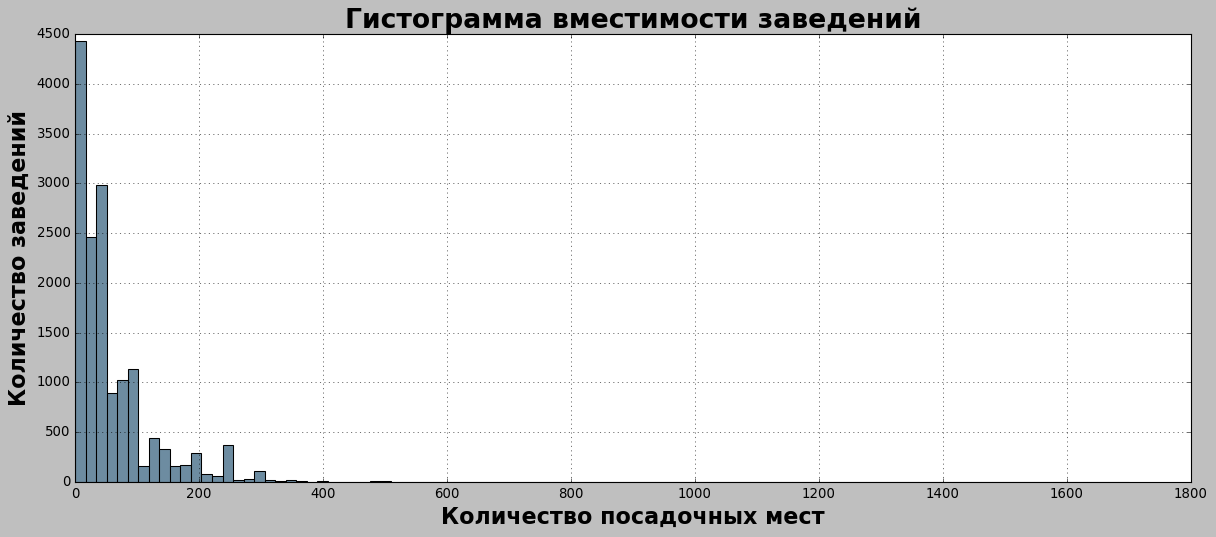

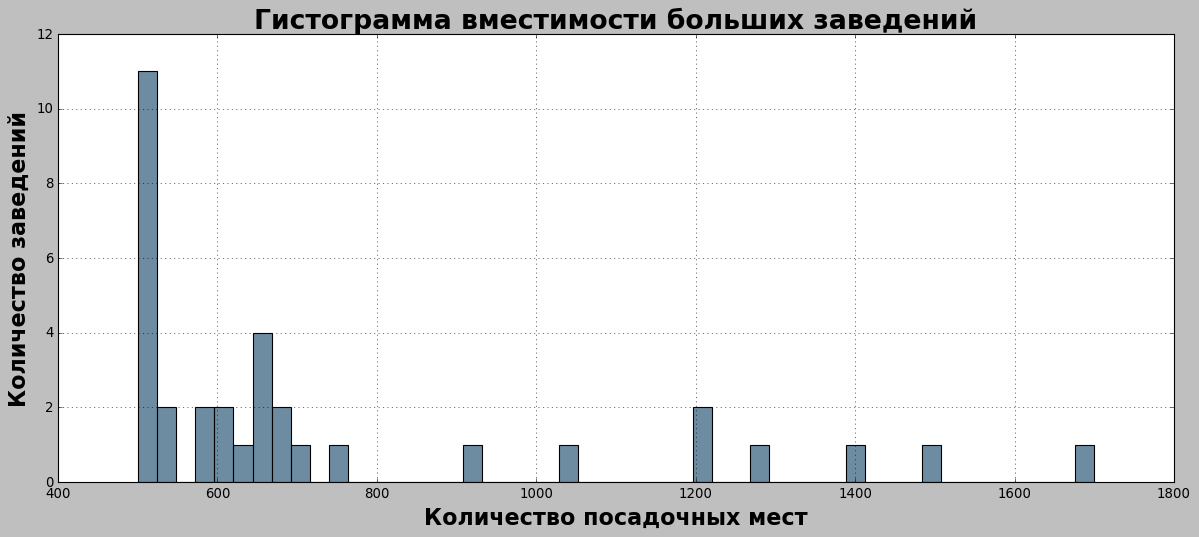

In [6]:
plt.style.use('classic')

plt.figure(figsize=(18, 7))
sns.histplot(df_raw['number'], bins=100, color='#3c6682')
plt.xlabel('Количество посадочных мест', fontsize=20, color='black', fontweight='semibold')
plt.ylabel('Количество заведений', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black')
plt.yticks(color='black')
plt.title('Гистограмма вместимости заведений', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

plt.figure(figsize=(18, 7))
sns.histplot(df_raw.query('number >= 500')['number'], bins=50, color='#3c6682')
plt.xlabel('Количество посадочных мест', fontsize=20, color='black', fontweight='semibold')
plt.ylabel('Количество заведений', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black')
plt.yticks(color='black')
plt.title('Гистограмма вместимости больших заведений', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+2><b> 2. АНАЛИЗ ДАННЫХ. </b></font>

<font size=+1><b> 2.1. Количество заведений общественного питания по видам. </b></font>

- Кафе - с большим отрывом самый распространённый вид заведений (6099).
- Столовые, рестораны и фастфуд - виды заведений, образующих среднюю группу по количеству (2587, 2285 и 1923 соответсвенно).
- Остальные виды - численностью менее 1000 заведений.
    
</div>

In [7]:
df = df_raw.groupby('object_type', as_index=False).agg({'id': 'count'}).sort_values(by='id', ascending=False)
df.columns = ('object_type', 'rest_number')

df= df.merge(df_raw, on='object_type', how='left')

df = df.replace('предприятие быстрого обслуживания', 'фастфуд')
df = df.replace('магазин (отдел кулинарии)', 'кулинария')

In [8]:
df['object_with_count'] = df['object_type'] + df['rest_number'].map(lambda x: " ({0})".format(x))

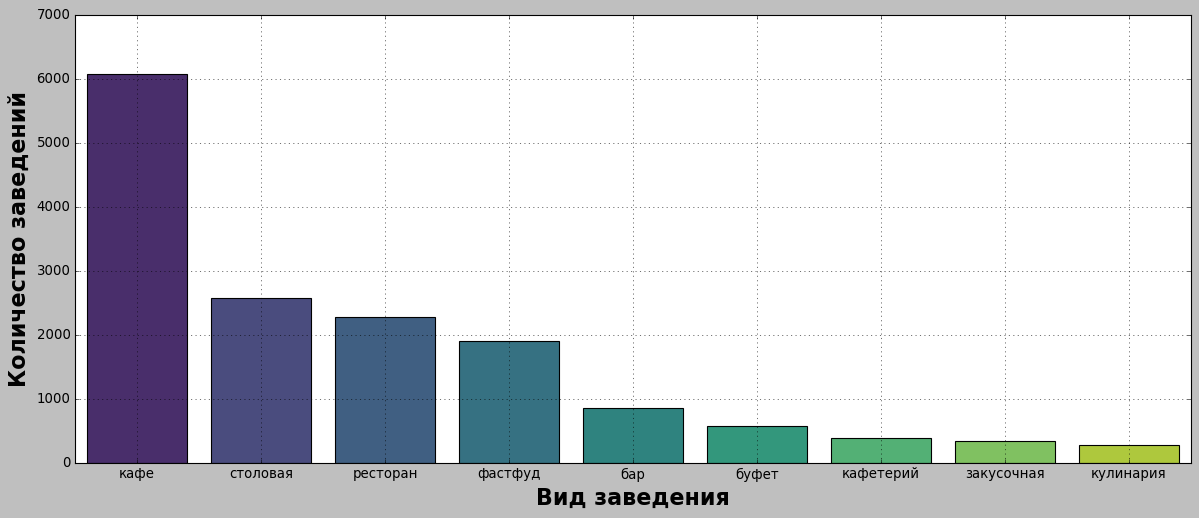

In [9]:
plt.figure(figsize=(18, 7))
sns.barplot(x=df['object_type'], y=df['rest_number'], palette='viridis')
plt.xlabel('Вид заведения', fontsize=20, color='black', fontweight='semibold')
plt.ylabel('Количество заведений', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.title('Количество заведений по видам', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.2. Количество сетевых и несетевых заведений. </b></font>

Несетевых заведений явно больше: 12398 против 2968.
</div>

In [10]:
chain_count = df.groupby('chain', as_index=False).agg({'id':'count'}).sort_values(by='id', ascending=False)
chain_count = chain_count.replace('нет', 'Несетевое')
chain_count = chain_count.replace('да', 'Сетевое')

In [11]:
print('Количество сетевых заведений:', chain_count.loc[0, 'id'])
print('\nКоличество несетевых заведений:', chain_count.loc[1, 'id'])

Количество сетевых заведений: 2964

Количество несетевых заведений: 12317


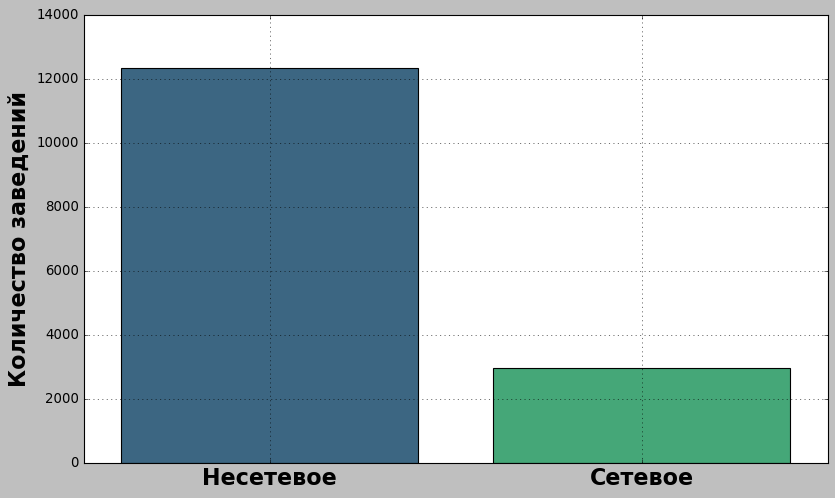

In [12]:
plt.figure(figsize=(12, 7))
sns.barplot(x=chain_count['chain'], y=chain_count['id'], palette='viridis')
plt.xlabel('')
plt.ylabel('Количество заведений', fontsize=20, color='black', fontweight='semibold')
plt.xticks(fontsize=20, color='black', fontweight='semibold')
plt.yticks(color='black')
#plt.title('Количество несетевых и сетевых заведений', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.3. Доля сетевых заведений по видам. </b></font>

- Наибольшая доля сетевых заведений с отрывом у фастфуда (41.13%).
- Практически нет сетевых заведений среди баров, буфетов, столовых (менее 5%).
- Доля среди остальных видов колеблется от 13.07% до 28.57%.

</div>

In [13]:
chain_count = df.groupby('object_with_count', as_index=False).agg({'id':'count'}).merge(df.query('chain == "да"')
                          .groupby('object_with_count', as_index=False).agg({'id':'count'}), on='object_with_count', how='left')

chain_count.columns = ('object_with_count', 'total_count', 'chain_count')

In [14]:
chain_count['chain_part'] = (chain_count['chain_count']*100/chain_count['total_count']).map(lambda x: 
                                                                                        "{0:.2f}".format(x)).astype('float')
chain_count = chain_count.sort_values(by='total_count', ascending=False)

In [15]:
chain_count

,object_with_count,total_count,chain_count,chain_part
3,кафе (6071),6071,1396,22.99
7,столовая (2584),2584,3,0.12
6,ресторан (2282),2282,543,23.79
8,фастфуд (1897),1897,788,41.54
0,бар (855),855,37,4.33
1,буфет (576),576,11,1.91
4,кафетерий (395),395,52,13.16
2,закусочная (348),348,56,16.09
5,кулинария (273),273,78,28.57


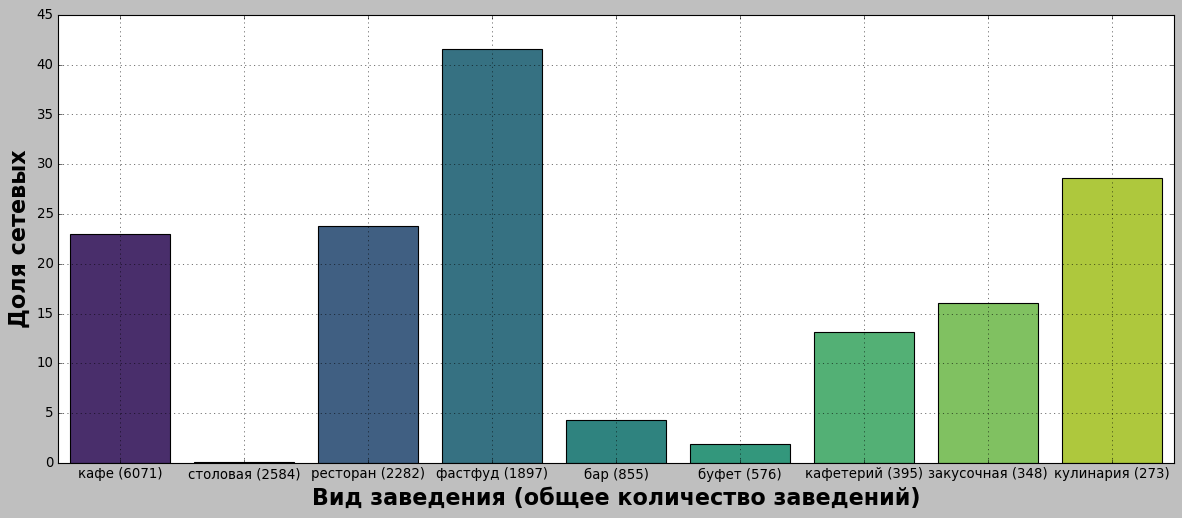

In [16]:
plt.figure(figsize=(18, 7))
sns.barplot(x=chain_count['object_with_count'], y=chain_count['chain_part'], palette='viridis')
plt.xlabel('Вид заведения (общее количество заведений)', fontsize=20, color='black', fontweight='semibold')
plt.ylabel('Доля сетевых', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.title('Доля сетевых заведений по видам', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.4. Анализ количества посадочных мест в сетевых заведениях. </b></font>

В этом разделе необходимо ответить на вопрос о том, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Для этого сгруппируем данные по сетевым заведениям по названиям и после составим таблицу по категориям "мало/средне/много мест" и "мало/средне/много заведений". Составим соотвествующую таблицу.
    
Из результатов видно, что больше всего сетей, которые состоят из 1) малого числа заведений с небольшим числом мест и 2) малого числа заведений с большим числом мест.
    
</div>

In [17]:
chain_mean = df.query('chain == "да"').groupby('object_name', as_index=False).agg({'id':'count', 'number': 'mean'})

chain_mean = chain_mean.query('id != 1')
chain_mean.head()

,object_name,id,number
3,bocconcino,3,66.666667
6,burger club,3,20.333333
8,coffeeshop company,4,47.250000
9,cofix,25,9.600000
11,correas,3,44.000000


In [18]:
chain_object = np.percentile(chain_mean['id'], [33.3, 66.7])
print(chain_object)

chain_number = np.percentile(chain_mean['number'], [33.3, 66.7])
print(chain_number)

[3. 6.]
[26.   68.83]


In [19]:
chain_cut = pd.DataFrame(data={'мало_мест': [chain_mean.query('id <= 3 and number <= 26').shape[0], 
                               chain_mean.query('3 < id <= 6 and number <= 26').shape[0],
                               chain_mean.query('id > 6 and number <= 26').shape[0]],
                               'средне_мест': [chain_mean.query('id <= 3 and 26 < number <= 68.83').shape[0], 
                               chain_mean.query('3 < id <= 6 and 26 < number <= 68.83').shape[0],
                               chain_mean.query('id > 6 and 26 < number <= 68.83').shape[0]],
                                'много_мест': [chain_mean.query('id <= 3 and number > 68.83').shape[0], 
                               chain_mean.query('3 < id <= 6 and number > 68.83').shape[0],
                               chain_mean.query('id > 6 and number > 68.83').shape[0]],
                              }, index=['мало_заведений', 'средне_заведений', 'много_заведений'])

chain_cut

,мало_мест,средне_мест,много_мест
мало_заведений,43,36,43
средне_заведений,16,20,19
много_заведений,24,25,20


In [20]:
# Код ревьюера

pd.cut(chain_mean['id'], [1,3,6,np.inf], labels=['мало_заведений','среднее_заведений', 'много заведений']).value_counts()

мало_заведений       122
много заведений       69
среднее_заведений     55
Name: id, dtype: int64

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.5. Среднее число посадочных мест по видам. </b></font>

Для всей массы заведений характерны следующие выводы относительно среднего количества посадочных мест:
    
- Столовые и рестораны имеют наибольшую среднюю вмещаемость (130 и 97 мест).
- Кафе, бары, буфеты - заведения со средней вмещаемостью (от 40 до 51).
- Фастфуд и остальные виды характеризуются малым средним количеством посадочных мест (21 и менее).

</div>

In [21]:
df.groupby('object_type', as_index=False).agg({'number': 'mean'}).sort_values(by='number', ascending=False)

,object_type,number
7,столовая,130.337848
6,ресторан,96.884750
1,буфет,51.425347
0,бар,43.533333
3,кафе,39.785703
8,фастфуд,20.808645
4,кафетерий,9.184810
2,закусочная,7.847701
5,кулинария,5.589744


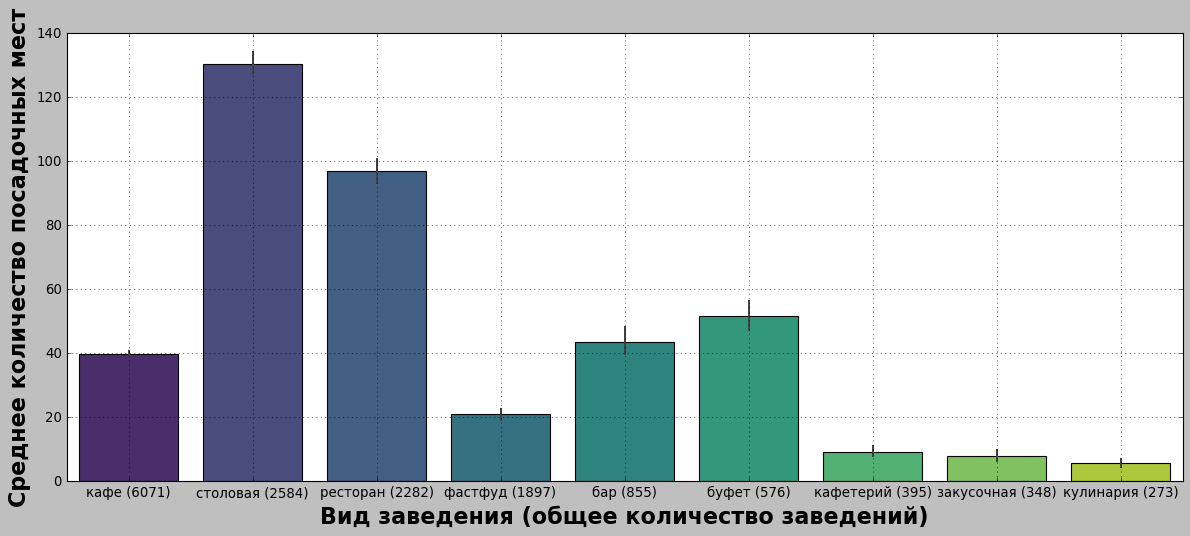

In [22]:
plt.figure(figsize=(18, 7))
sns.barplot(x=df['object_with_count'], y=df['number'], palette='viridis')
plt.xlabel('Вид заведения (общее количество заведений)', fontsize=20, color='black', fontweight='semibold')
plt.ylabel('Среднее количество посадочных мест', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.title('Среднее количество мест по видам заведения', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.6. Топ улиц по количеству заведений. </b></font>
    
При обработке данных об адресах заведений было обнаружено, что они нестандартизированы: некоторые из них не начинаются с названия города. Однако, в 99.54% случаев адрес начинается со слов "город Москва", и, скорее всего, далее идёт название улицы. В связи с этим было принято решение в применить упрощенную обработку адресов без кастомных функций.
    
В топ-10 самых популярных улиц, что логично, входят в основном крупные радиальные улицы. Относительно их расположения можно сказать что:
- Профсоюзная улица, Ленинский проспект, проспект Вернадского частично или полностью расположены в ЮЗАО.
- Варшавское шоссе, Каширское шоссе, Кировоградское частично или полностью расположены в ЮАО.
- Оставшиеся улицы топа расположены в СВАО, САО, ЦАО, ЗАО.

</div>

In [23]:
addresses = df['address'].map(lambda x: x.split(', ')[0])

print(addresses.value_counts().head(10))

print('\nГород Москва в начале адреса:', round(addresses.value_counts()[0]*100 / df.shape[0], 2), '%')

город Москва               15210
Николоямская улица             4
улица Ленинская Слобода        4
улица Льва Толстого            3
Солянский тупик                3
город Московский               3
Ленинградский проспект         2
2-я Брестская улица            2
Партизанская улица             2
Таганская площадь              2
Name: address, dtype: int64

Город Москва в начале адреса: 99.54 %


In [24]:
df['street'] = df['address'].map(lambda x: x.split(', ')[1])

street_count = df.groupby('street', as_index=False, ).agg({'id': 'count'}).sort_values(by='id', ascending=False)
street_count.columns = ('street', 'object_number')

In [25]:
street_count.head(15)

,street,object_number
1334,город Зеленоград,232
1452,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,137
1449,проспект Вернадского,128
674,Кутузовский проспект,114


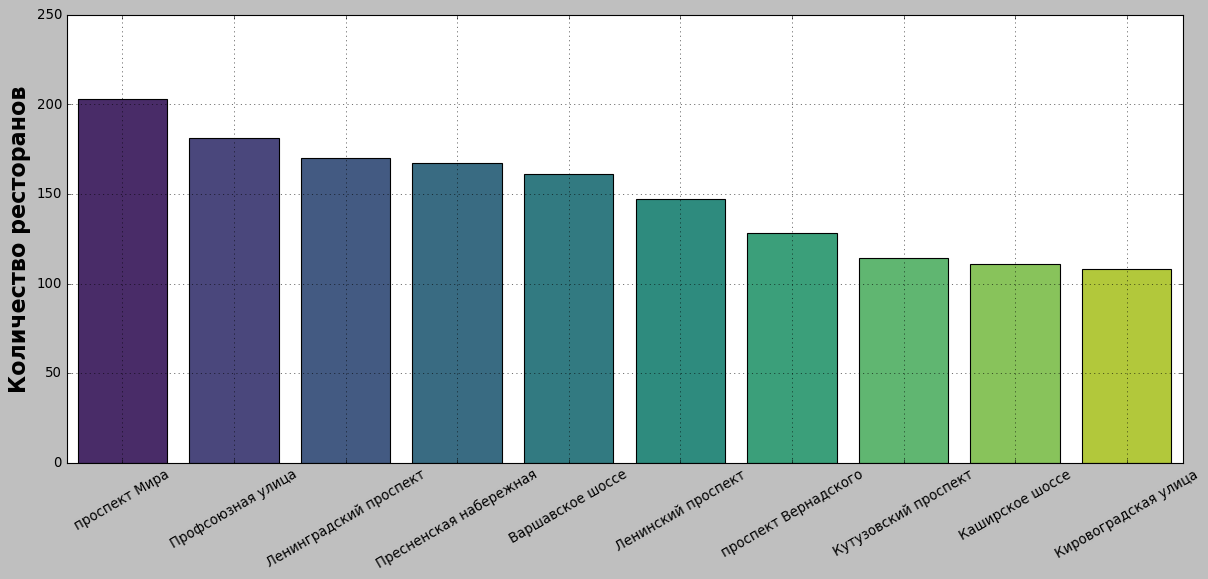

In [26]:
plt.figure(figsize=(18, 7))
sns.barplot(x='street', y='object_number', data = street_count
            .query('street != "город Зеленоград" and street != "поселение Сосенское"').head(10), palette='viridis')
#plt.xlabel('Название улицы', fontsize=20, color='black', fontweight='semibold')
plt.xlabel('')
plt.ylabel('Количество ресторанов', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black', rotation = 30)
plt.yticks(color='black')
#plt.title('Топ-10 улиц по количеству заведений', fontsize=24, color='black', fontweight='semibold')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.7. Улицы с одним заведением. </b></font>

Для определения районов, в которых расположены улицы с одним заведением, воспользуемся данными из внешних источников.    
    
Как видно из загруженных данных, практически все подобные улицы расположены в центре Москвы. Наиболее число улиц с одним заведением – в Таганском районе.

</div>

In [27]:
print('Число улиц с одним заведением:', street_count.query('object_number == 1').shape[0])

Число улиц с одним заведением: 579


In [28]:
spreadsheet_id = '1gG9fkSPXz-PJhsd-w2YDy9GJYhDqqNPxjUrhhyZS6O4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
st = pd.read_csv(BytesIO(r.content))
st.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [29]:
print('Дубликаты в датасете st:', st.duplicated().sum())

st = st.drop_duplicates().reset_index(drop=True)

Дубликаты в датасете st: 8


In [30]:
one_object = street_count.query('object_number == 1').merge(st[['streetname', 'area']], 
                                                            left_on='street', right_on='streetname', how='left')

one_object_list = one_object.groupby('area', as_index=False).agg({'street': 'count'}).sort_values(by='street', ascending=False)

one_object_list.head()

,area,street
93,Таганский район,27
79,Район Хамовники,26
3,Басманный район,25
94,Тверской район,20
20,Пресненский район,19


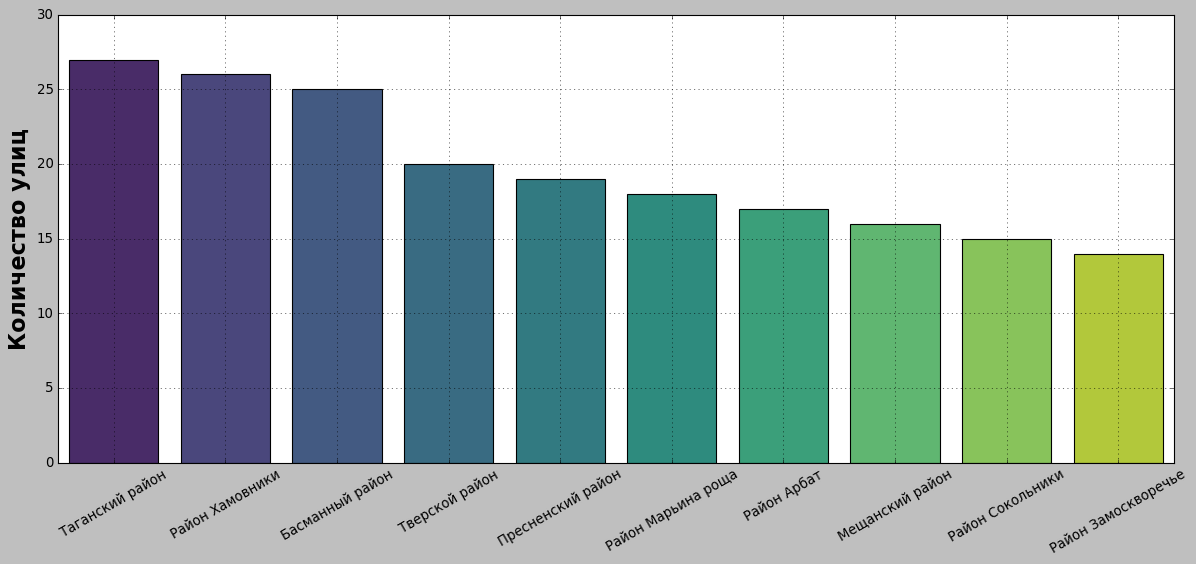

In [31]:
plt.figure(figsize=(18, 7))
sns.barplot(x='area', y='street', data = one_object_list.head(10), palette='viridis')
plt.xlabel('')
plt.ylabel('Количество улиц', fontsize=20, color='black', fontweight='semibold')
plt.xticks(color='black', rotation = 30)
plt.yticks(color='black')
plt.grid()
plt.show()

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<font size=+1><b> 2.7. Выводы. </b></font>
    
- Стоит рассмотреть такие виды заведений как кафе (в первую очередь), а также бар или фастфуд – исходя из их распространённости в Москве и планируемой концепции.
- Если планируется открыть заведение в формате кафе или бара, то стоит ориентироваться на 40 посадочных мест. В случае фастфуда – на 21.
- Для фастфуда (и в меньшей степени кафе) следует учесть большую долю сетевых заведений в их распределении (на случай расширения сети).
- Если важно отсутствие конкурентов, то есть смысл найти место в центре Москвы. Если нужна популярная локация, то стоит рассмотреть одну из топ-10 самых популярных улиц.

</div>